In [1]:
# Leemos información de documento Excel
import pandas as pd
dataFrame = pd.read_csv('../Material/Database.csv', sep=';')
print(dataFrame)

                             ID     Class
0    OCTA1013661_19350130_1.png  Glaucoma
1    OCTA1153367_19320227_2.png  Glaucoma
2    OCTA1653454_19640601_2.png  Glaucoma
3     OCTADB5052_19500115_2.png  Glaucoma
4     OCTADB5551_19491106_1.png  Glaucoma
..                          ...       ...
184   OCTADB7376_19590206_1.png   Healthy
185   OCTADB7376_19590206_2.png   Healthy
186   OCTADB7377_19620916_2.png   Healthy
187   OCTADB7398_19940401_1.png   Healthy
188   OCTADB7398_19940401_2.png   Healthy

[189 rows x 2 columns]


In [2]:
# Extraer información de interés
import numpy as np
clases, frec = np.unique(dataFrame.Class, return_counts=True)
print(clases, frec)

['Glaucoma' 'Healthy'] [93 96]


142
OCTADB7271_19610921_1.png


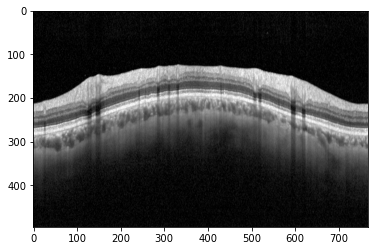

In [10]:
# Seleccionar una muestra aleatoria de nuestra base de datos
import random
import cv2
import matplotlib.pyplot as plt
num = random.randint(0, len(dataFrame))
print(num)
name_img = dataFrame.ID[num]
print(name_img)

img = cv2.imread('../Material/Images/' + name_img)
plt.imshow(img, cmap='gray')
plt.show()

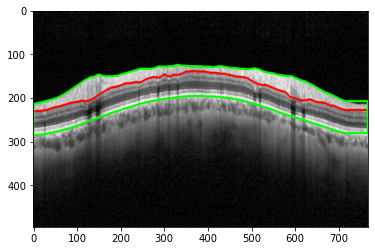

In [12]:
# Leemos las máscaras y ploteamos los contornos sober la imagen original
rnfl_mask = cv2.imread('../Material/RNFL_masks/' + name_img, 0)
retina_mask = cv2.imread('../Material/Retina_masks/' + name_img, 0)

cont_rnfl, _ = cv2.findContours(rnfl_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cont_retina, _ = cv2.findContours(retina_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

image = cv2.drawContours(img.copy(), cont_rnfl, -1, (255, 0, 0), 3)
image = cv2.drawContours(image.copy(), cont_retina, -1, (0, 255, 0), 3)

plt.imshow(image, cmap='gray')
plt.show()